In [1]:
# To lesrn about one hot encoding and dummy variables 
#      https://youtu.be/pW-OCP9azz4

In [2]:
# Consider a dataset of a restaurant which has columns such as sex, day, bill, time, size. Our target is to predict the
# bill using the rest data to train the model. Note that the columns such as sex, day are categorical variables with no
# mathematical significance i.e., there is no mathematical pattern like good<better<best kind of categorical variables.
# We also know that any model trains itself based on mathematical data and does not understand categorical data. We also
# cannot drop the categorical variables as it will have an impact on the training of the model. But we can give the 
# categorical variables numbers which are called Dummy variables such as male as 1 and female as 2 in the sex column.
# But our model will bring mathematical significance to our dummy variables like 2>1 -> female>male. To solve these issues, we
# use one-hot encoding. We create new columns such as male and female (considering sex column). Then we take each column
# and check whether the sex column has the new column heading. If yes, we assign the cell with 1 or else we assign the cell with
# 0. For example, we fill the male column with 1 if the sex column has male in the same row or else we fill it with zero.

In [3]:
from IPython.display import Image
from IPython.core.display import HTML

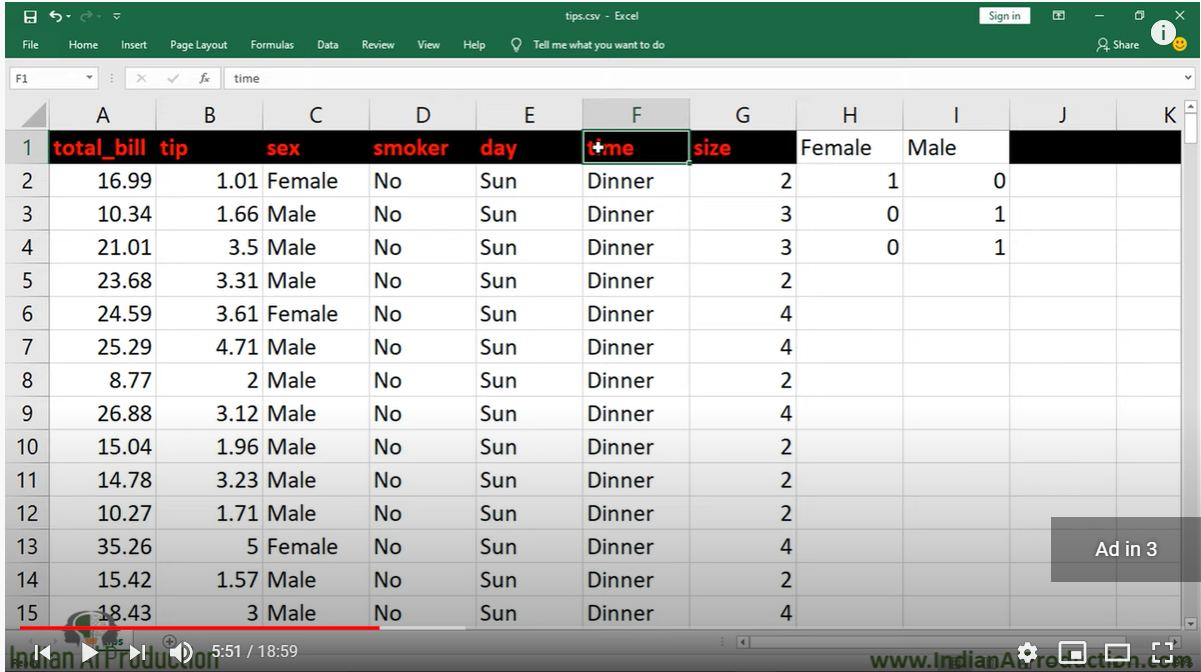

In [7]:
Image(filename="one-hot-encoding.png",width=800)

# Creating dummy variables using Pandas get_dummies() method

In [8]:
import pandas as pd
import seaborn as sns

In [13]:
# To load an online dataset of seaborn we can use load_dataset() method of seaborn.

In [10]:
sns.load_dataset("tips")

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [11]:
df=sns.load_dataset("tips")

In [12]:
df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [14]:
# To convert the dataset with its dummy variables we can use get_dummies() method of pandas

In [16]:
dummy_df=pd.get_dummies(df)
dummy_df

total_bill   tip  size  sex_Male  sex_Female  smoker_Yes  smoker_No  \
0         16.99  1.01     2         0           1           0          1   
1         10.34  1.66     3         1           0           0          1   
2         21.01  3.50     3         1           0           0          1   
3         23.68  3.31     2         1           0           0          1   
4         24.59  3.61     4         0           1           0          1   
..          ...   ...   ...       ...         ...         ...        ...   
239       29.03  5.92     3         1           0           0          1   
240       27.18  2.00     2         0           1           1          0   
241       22.67  2.00     2         1           0           1          0   
242       17.82  1.75     2         1           0           0          1   
243       18.78  3.00     2         0           1           0          1   

     day_Thur  day_Fri  day_Sat  day_Sun  time_Lunch  time_Dinner  
0           0        0        0        1           0            1  
1           0        0        0        1           0            1  
2           0        0        0        1           0            1  
3           0        0        0        1           0            1  
4           0        0        0        1           0            1  
..        ...      ...      ...      ...         ...          ...  
239         0        0        1        0           0            1  
240         0        0        1        0           0            1  
241         0        0        1        0           0            1  
242         0        0        1        0           0            1  
243         1        0        0        0           0            1  

[244 rows x 13 columns]

In [19]:
# You can observe that all the categorical variables are converted to dummy variables and are dropped. You can also observe that
# there is excess of information than required. Example: Consider sex_Male and sex_Female columns, they have respective 
# ones and zeros in their columns. If you would have removed any of the two columns, even then you would have all the
# information. Suppose you removed the sex_Male column, looking the sex_Female column you can tell whether it was a male
# or female in that particular column. Hence, to remove this extra information, we remove one column from each category
# of the dummy variables. If the excess information is not removed, we face a trap called the dummy variable trap.

In [20]:
dummy_df_no_trap=pd.get_dummies(df,drop_first=True)
dummy_df_no_trap

total_bill   tip  size  sex_Female  smoker_No  day_Fri  day_Sat  day_Sun  \
0         16.99  1.01     2           1          1        0        0        1   
1         10.34  1.66     3           0          1        0        0        1   
2         21.01  3.50     3           0          1        0        0        1   
3         23.68  3.31     2           0          1        0        0        1   
4         24.59  3.61     4           1          1        0        0        1   
..          ...   ...   ...         ...        ...      ...      ...      ...   
239       29.03  5.92     3           0          1        0        1        0   
240       27.18  2.00     2           1          0        0        1        0   
241       22.67  2.00     2           0          0        0        1        0   
242       17.82  1.75     2           0          1        0        1        0   
243       18.78  3.00     2           1          1        0        0        0   

     time_Dinner  
0              1  
1              1  
2              1  
3              1  
4              1  
..           ...  
239            1  
240            1  
241            1  
242            1  
243            1  

[244 rows x 9 columns]

# Creating dummy variables using Scikit-Learn One Hot Encoder

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
# First we have to assign the model.
oh_enc = OneHotEncoder(sparse=False,drop='first')

In [28]:
# Then we have to fit and transform the model or else use the shortcut fit_transform method
dummy_arr=oh_enc.fit_transform(df[["sex","smoker","day","time"]])
dummy_arr

array([[0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0.],
       ...,
       [1., 1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [30]:
dummy_df_no_trap_one_hot_encoder=pd.DataFrame(data=dummy_arr,columns=["sex_male",
                                                                      "smoker_Yes","day_Thurs","day_Fri","day_Sat","time_Lunch"])
dummy_df_no_trap_one_hot_encoder

sex_male  smoker_Yes  day_Thurs  day_Fri  day_Sat  time_Lunch
0         0.0         0.0        0.0      1.0      0.0         0.0
1         1.0         0.0        0.0      1.0      0.0         0.0
2         1.0         0.0        0.0      1.0      0.0         0.0
3         1.0         0.0        0.0      1.0      0.0         0.0
4         0.0         0.0        0.0      1.0      0.0         0.0
..        ...         ...        ...      ...      ...         ...
239       1.0         0.0        1.0      0.0      0.0         0.0
240       0.0         1.0        1.0      0.0      0.0         0.0
241       1.0         1.0        1.0      0.0      0.0         0.0
242       1.0         0.0        1.0      0.0      0.0         0.0
243       0.0         0.0        0.0      0.0      1.0         0.0

[244 rows x 6 columns]

In [32]:
dummy_df_no_trap_one_hot_encoder=pd.concat([df.select_dtypes(include=["int64","float64"]),
                                           dummy_df_no_trap_one_hot_encoder],axis=1)
dummy_df_no_trap_one_hot_encoder

total_bill   tip  size  sex_male  smoker_Yes  day_Thurs  day_Fri  \
0         16.99  1.01     2       0.0         0.0        0.0      1.0   
1         10.34  1.66     3       1.0         0.0        0.0      1.0   
2         21.01  3.50     3       1.0         0.0        0.0      1.0   
3         23.68  3.31     2       1.0         0.0        0.0      1.0   
4         24.59  3.61     4       0.0         0.0        0.0      1.0   
..          ...   ...   ...       ...         ...        ...      ...   
239       29.03  5.92     3       1.0         0.0        1.0      0.0   
240       27.18  2.00     2       0.0         1.0        1.0      0.0   
241       22.67  2.00     2       1.0         1.0        1.0      0.0   
242       17.82  1.75     2       1.0         0.0        1.0      0.0   
243       18.78  3.00     2       0.0         0.0        0.0      0.0   

     day_Sat  time_Lunch  
0        0.0         0.0  
1        0.0         0.0  
2        0.0         0.0  
3        0.0         0.0  
4        0.0         0.0  
..       ...         ...  
239      0.0         0.0  
240      0.0         0.0  
241      0.0         0.0  
242      0.0         0.0  
243      1.0         0.0  

[244 rows x 9 columns]